# Importing Libraries

In [1]:
# Importing Important Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation and Cleaning

In [8]:
def prepare_data(filename):
    """
    Reads a CSV file into a DataFrame, removes rows with missing values,
    and returns the first few rows of the DataFrame.
    """
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)

    # Remove rows with any missing values
    df = df.dropna()

    # Return the first few rows of the DataFrame
    return df.head()


In [9]:
filename = "HeartDiseaseTrain-Test.csv"
prepare_data(filename)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


# Data Statistics

In [31]:
def calculate_statistics(data):
    """
    Calculates various statistics for the dataset.
    """
    median_value = data.median(numeric_only=True)
    skewness = data.skew(numeric_only=True)
    kurtosis = data.kurt(numeric_only=True)

    statistics = {
        'Median': median_value,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Description': data.describe()
    }
    return statistics

In [32]:
calculate_statistics(df)

{'Median': age                        56.0
 resting_blood_pressure    130.0
 cholestoral               240.0
 Max_heart_rate            152.0
 oldpeak                     0.8
 target                      1.0
 dtype: float64,
 'Skewness': age                      -0.248866
 resting_blood_pressure    0.739768
 cholestoral               1.074073
 Max_heart_rate           -0.513777
 oldpeak                   1.210899
 target                   -0.052778
 dtype: float64,
 'Kurtosis': age                      -0.525618
 resting_blood_pressure    0.991221
 cholestoral               3.996803
 Max_heart_rate           -0.088822
 oldpeak                   1.314471
 target                   -2.001123
 dtype: float64,
 'Description':                age  resting_blood_pressure  cholestoral  Max_heart_rate  \
 count  1025.000000             1025.000000   1025.00000     1025.000000   
 mean     54.434146              131.611707    246.00000      149.114146   
 std       9.072290               17.51671

# PLOTS

## Categorical Graph

In [33]:
def plot_bar():
    """
    Function to create a bar chart for Chest Pain Type.
    """
    chest_pain_counts = df['chest_pain_type'].value_counts()
    plt.bar(chest_pain_counts.index, chest_pain_counts, color='Cyan', edgecolor='black')
    plt.title('Bar Chart Chest Pain Type')
    plt.xlabel('Chest Pain Type')
    plt.ylabel('No. of Patients')
    plt.xticks(rotation=40)
    plt.savefig('barplot.png')
    plt.show()

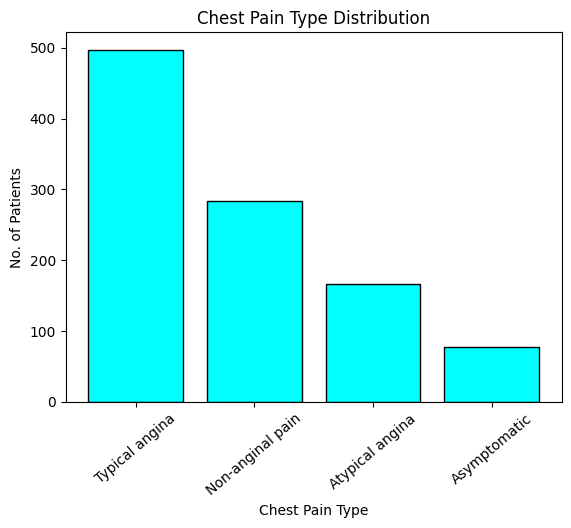

In [34]:
plot_bar()

## Relational Graph

In [27]:
# Function For plotting a violin plot
def plot_scatter():
    """
    Function to create a scatter plot for Resting Blood Pressure vs Cholesterol.
    """
    plt.scatter(df['age'], df['Max_heart_rate'], c=df['target'], cmap='coolwarm')
    plt.colorbar(label='0 = No Heart Disease  1 = Heart Disease', ticks=[df['target'].min(), df['target'].max()])
    plt.title('Age vs Heart Rate')
    plt.xlabel('Age')
    plt.ylabel('Heart Rate')
    plt.grid(True)
    plt.savefig('ScatterPlot.png')
    plt.show()

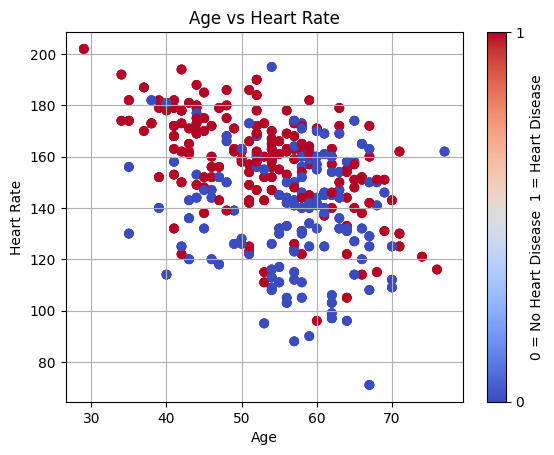

In [28]:
plot_scatter()

## Statistical Graph

In [15]:
# Function For plotting a Heatmap from Correlation Matrix
def plot_heatmap():
    """
    Function to create a correlation matrix heatmap.
    """
    correlation_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True)
    plt.title('Correlation Heatmap')
    plt.savefig('heatmap.png')
    plt.show()

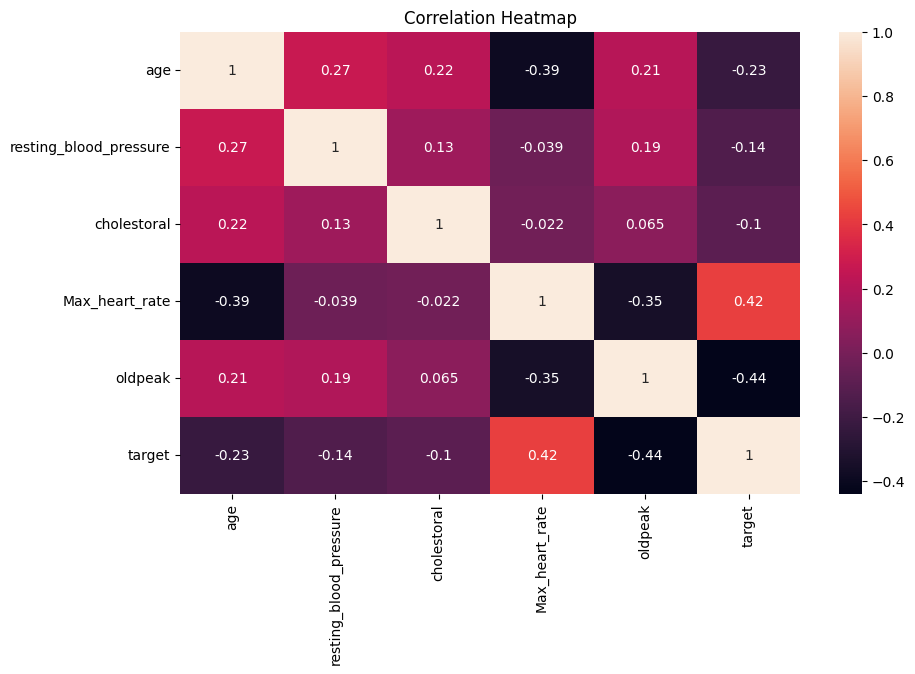

In [16]:
plot_heatmap()